In [1]:
%%writefile Detections2Features.py
import sys
import numpy as np
import pickle as pkl
import cv2

if __name__=='__main__':
    DATA_DIR =sys.argv[1]

DATA_DIR='/Users/yoavfreund/projects/butons/data/164'
print('DATA_DIR=%s'%(DATA_DIR))

with open(DATA_DIR+'/extracted_cells.pkl','br') as pkl_file:
    E=pkl.load(pkl_file)
    Examples=E['Examples']

df_dict=None
thresh=2000
for i in range(len(Examples)):
    e=Examples[i]

    Stats=cv2.connectedComponentsWithStats(np.int8(e['image']>thresh))

    if Stats[1] is None:
        continue
    seg=Stats[1]

    # Isolate the connected component at the middle of seg
    middle=np.array(np.array(seg.shape)/2,dtype=np.int16)
    middle_seg=seg[middle[0],middle[1]]
    middle_seg_mask = np.uint8(seg==middle_seg)

    # Calculate Moments
    moments = cv2.moments(middle_seg_mask)
    # Calculate Hu Moments
    huMoments = cv2.HuMoments(moments)

    features={'h%d'%i:huMoments[i,0]  for i in range(7)}
    features.update(moments)

    for key in ['animal','section','index','label','area','height2','width2']:
        features[key]=e[key]

    features['row']=e['row_center']+e['origin'][0]
    features['col']=e['col_center']+e['origin'][0]

    if df_dict==None:
        df_dict={}
        for key in features:
            df_dict[key]=[]

    for key in features:
        df_dict[key].append(features[key])


import pandas as pd
df=pd.DataFrame(df_dict)
outfile=DATA_DIR+'/puntas.csv'
print('df shape=',df.shape,'output_file=',outfile)

df.to_csv(outfile)

Overwriting Detections2Features.py


In [2]:
e

NameError: name 'e' is not defined

In [3]:
!head $DATA_DIR/puntas.csv

head: /puntas.csv: No such file or directory


In [4]:
import cv2
thresh=2000
Stats=cv2.connectedComponentsWithStats(np.int8(e['image']>thresh))
Stats[0]

NameError: name 'np' is not defined

In [5]:
seg=Stats[1]
imshow(seg)


NameError: name 'Stats' is not defined

In [82]:
middle=np.array(np.array(seg.shape)/2,dtype=np.int16)
middle

array([50, 50], dtype=int16)

In [83]:
middle_seg=seg[middle[0],middle[1]]
middle_seg

2

In [86]:
Stats[2][middle_seg],e['area']

(array([49, 49,  3,  3,  7], dtype=int32), 7)

In [122]:
for key in ['index','label','area','height2','width2']:
    features[key]=e[key]
features

{'h0': 0.19996952888869568,
 'h1': 0.004807484490333493,
 'h2': 0.0029203280141626353,
 'h3': 0.00016871685648051798,
 'h4': 1.0003237196370746e-07,
 'h5': 8.329713986313898e-06,
 'h6': 6.339290075281958e-08,
 'm00': 1599.0,
 'm10': 82733.0,
 'm01': 99098.0,
 'm20': 4458461.0,
 'm11': 5169807.0,
 'm02': 6475062.0,
 'm30': 248329187.0,
 'm21': 280669813.0,
 'm12': 341828093.0,
 'm03': 443725004.0,
 'mu20': 177817.29205753654,
 'mu11': 42430.618511569686,
 'mu02': 333464.99937460944,
 'mu30': -754346.4337663054,
 'mu21': -33997.44442487601,
 'mu12': 1546114.6932338718,
 'mu03': 1100161.5409317613,
 'nu20': 0.06954678602579416,
 'nu11': 0.016595197870921393,
 'nu02': 0.1304227428629015,
 'nu30': -0.007378187406689129,
 'nu21': -0.00033252562097077954,
 'nu12': 0.015122393966866952,
 'nu03': 0.010760570559204253,
 'index': 66,
 'label': 1,
 'area': 1599,
 'height2': 66,
 'width2': 50}

In [ ]:
# Calculate Moments
moments = cv2.moments(im)
# Calculate Hu Moments
huMoments = cv2.HuMoments(moments)

In [30]:
def plot_dist(uimg):
    H=uimg.flatten()
    H=np.sort(H)

    H=H[0:-1:10]
    plt.figure()
    plt.plot(H,np.arange(0,1,1./H.shape[0]))
    plt.grid()
    plt.figure()
    plt.hist(H,bins=100);

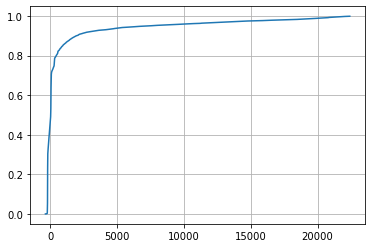

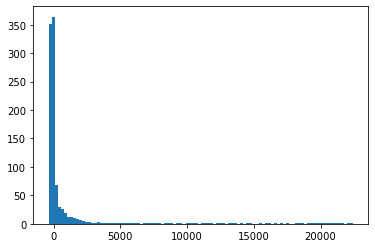

In [31]:
plot_dist(e['image']);

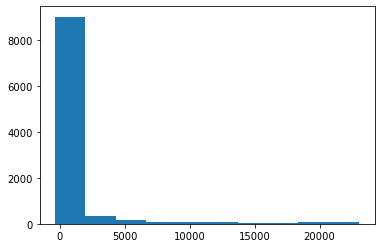

In [29]:
hist(e['image'].flatten());